# Data Insight: Top Factors For Startup Success

Building a successful startup is hard. Statistics show that [90% of startups fail](https://www.failory.com/blog/startup-failure-rate). So, what are the main factors that make successful startups?

In this article, we will explore the [Startup Success Prediction dataset](https://www.kaggle.com/datasets/manishkc06/startup-success-prediction) released on [Kaggle](https://www.kaggle.com/) to find data insights related to the success of startups.

This dataset contains information about industries, acquisitions, and investment details of nearly a thousand startups based in the USA from the 1980s to 2013.

To extract interesting trends from data, it's essential to understand how to transform raw data into meaningful information. To achieve this goal, we will perform the following steps:

1. Data exploration
2. Pre-processing 
3. Data analysis 
4. Data-driven conclusions 

Let's begin by understanding some concepts related to startups.

## Understanding the Startup Ecosystem
Startups raise money in stages called **funding rounds**, like Series A, B, or C. These rounds enable the startups to invest the necessary resources for their growth.

Startups set goals called **milestones**, like launching a product or getting a certain number of users. These reflect their performance to the investors.

Finally, startups secure funding from two types of sources:
- **Angel investors** are individuals who provide personal capital for investment.
- **Venture capital firms** are corporate entities specializing in startup investments.
Now that you understand the context, let's explore the data.

## Data Exploration

Data exploration is the first step in data analysis. It involves examining datasets to identify patterns and anomalies. 

First, we import the following libraries. We will use these packages for data manipulation, analysis, and visualization:

In [153]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

Next, we load the data into a [Pandas](https://pandas.pydata.org/) dataframe.

In [154]:
file_path = os.path.join('..', 'saved_model', 'startup.csv')
dataframe = pd.read_csv(file_path, encoding="ISO-8859-1")
dataframe.head(2)

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.00,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.75,1,acquired


The `status` variable is the most important feature of this dataset. This binary variable indicates whether a startup has been acquired or closed.

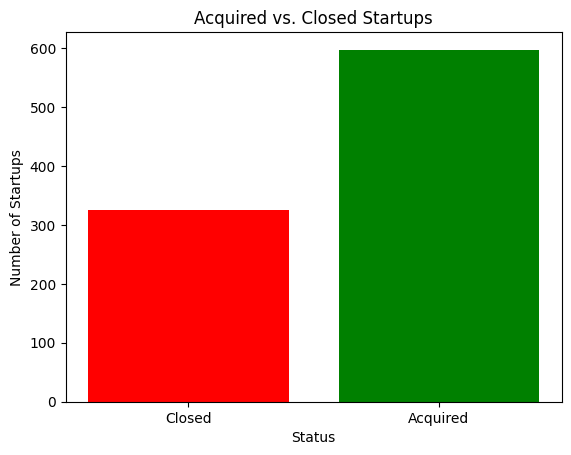

In [155]:
# Creating a DataFrame
df_copy = pd.DataFrame(dataframe)

df_copy['binary_status'] = df_copy['status'].map({'acquired': 1, 'closed': 0})

# Counting the occurrences of each status
status_counts = df_copy['binary_status'].value_counts()

# Show the bar plot
plt.bar(status_counts.index, status_counts.values, color=['green', 'red'])
plt.xticks([0, 1], ['Closed','Acquired'])
plt.xlabel('Status')
plt.ylabel('Number of Startups')
plt.title('Acquired vs. Closed Startups')
plt.show()

From [trustworthy sources](https://explodingtopics.com/blog/startup-failure-stats), we know that less than 10% of startups succeed. In this dataset, 597 startups were acquired, while 326 closed, resulting in a success rate of 64%. This statistic is far from the truth, most likely because the companies reported in this dataset were already successful startups.

## Data Pre-processing

Pre-processing consists of cleaning and organizing the raw data:
- **Data cleaning**: This step involves identifying and correcting errors, such as typos, duplicates, or incorrect entries. It is essential for maintaining data integrity. We will pay particular attention to:
- - The irrelevant features.
- - The missing values.
- - The negative values where it shouldn't be so.
- **Data transformation**: Modifies data to re-organize them into a format appropriate for performing analysis. These are the common transformations we will perform:
- - **Normalization** and **standardization**: These techniques adjust data to a common scale, making it easier to compare them.
- - **Encoding categorical data**: Map categorical variables to integers.

### Handle Irrelevant Features

An irrelevant feature is a data attribute that is not meaningful for the task. Eliminating irrelevant variables simplifies the analysis process. It ensures that we focus on meaningful factors by reducing unnecessary information and improving clarity in the data exploration.
  
To start dropping variables, let's analyze the details contained in each feature.

In [156]:
dataframe.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In this code block, we remove features that are not important and explain the main reasons.

In [157]:
dataframe = dataframe.drop([
    'Unnamed: 0',      # Not useful for our analysis. 
    'latitude',        # Not useful for our analysis. 
    'longitude',       # Not useful for our analysis. 
    'zip_code',        # Not useful for our analysis. 
    'id',              # Not useful for our analysis. 
    'name',            # Not useful for our analysis. 
    'Unnamed: 6',      # Not useful for our analysis. 
    'object_id',       # Not useful for our analysis. 
    'labels',          # Information already included in "status" column.
    'state_code.1',    # Information already included in "state" column.
    'is_CA',           # Information already included in "state" column.
    'is_NY',           # Information already included in "state" column.
    'is_MA',           # Information already included in "state" column.
    'is_TX',           # Information already included in "state" column.
    'is_otherstate',   # Information already included in "state" column.
    'is_software',     # Information already included in "state" column.
    'is_web',          # Information already included in "state" column.
    'is_mobile',       # Information already included in "state" column.
    'is_enterprise',   # Information already included in "state" column.
    'is_advertising',  # Information already included in "state" column.
    'is_gamesvideo',   # Information already included in "state" column.
    'is_ecommerce',    # Information already included in "state" column.
    'is_biotech',      # Information already included in "state" column.
    'is_consulting',   # Information already included in "state" column.
    'is_othercategory',# Information already included in "state" column.
], axis=1).copy()


We've simplified the DataFrame. It had 50 columns before, but now it has just 24. 

In [158]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state_code                923 non-null    object 
 1   city                      923 non-null    object 
 2   founded_at                923 non-null    object 
 3   closed_at                 335 non-null    object 
 4   first_funding_at          923 non-null    object 
 5   last_funding_at           923 non-null    object 
 6   age_first_funding_year    923 non-null    float64
 7   age_last_funding_year     923 non-null    float64
 8   age_first_milestone_year  771 non-null    float64
 9   age_last_milestone_year   771 non-null    float64
 10  relationships             923 non-null    int64  
 11  funding_rounds            923 non-null    int64  
 12  funding_total_usd         923 non-null    int64  
 13  milestones                923 non-null    int64  
 14  category_c

Here's a description of the most important features:
- `state_code`: The state where the startup is located.
- `city`: The city where the startup is located.
- `founded_at`: Founding date
- `closed_at`: The date when the startup was closed, if applicable.
- `relationships`: The number of key business relationships or partnerships the startup has.
- `funding_rounds`: The total number of funding rounds the startup has gone through.
- `funding_total_usd`: The total amount of funding the startup has received, in USD.
- `milestones`: Total number of significant achievements or events in the life of a startup. 
- `category_code`: The primary field of the startup's business. Like `software`, `music` and so on.

 ### Missing Values

Missing values are data points in a dataset where information is simply not recorded for a specific variable. 

It is important to handle missing values to preserve the integrity of your dataset. Without proper handling, null values can lead to errors or misleading results during statistical analyses.

In [159]:
x = dataframe.isnull().sum()
missing_values = x[x > 0].sort_values(ascending=False)
print(missing_values)

closed_at                   588
age_first_milestone_year    152
age_last_milestone_year     152
dtype: int64


Handling null values varies based on data characteristics and analysis goals. The chosen method should be specific to each case.

As shown above, we've identified **three features** that contain missing values.

Given that `age_first_milestone_year` and `age_last_milestone_year` are continuous numerical variables, our chosen imputation method will involve filling the missing values with the respective means for these variables.

In [160]:
dataframe["age_first_milestone_year"] = dataframe["age_first_milestone_year"].fillna(
    dataframe["age_first_milestone_year"].mean()
)
dataframe["age_last_milestone_year"] = dataframe["age_last_milestone_year"].fillna(
    dataframe["age_last_milestone_year"].mean()
)

The missing values in `closed_at` represent startups that are still open and will not be filled for now. This approach preserves the information that certain startups are still active without arbitrarily assigning a closure date.
  
Now that we've handled missing values, let's proceed with the negative values.

### Negative values

Negative values can be important indicators, especially in financial data where they often represent debt or losses. Removing them without careful consideration could result in missing critical information. 

However, negative numbers might indicate errors. Thus requiring changes to the data.

To find negative values, we'll use **box plots**. Box plots make it easy to spot negative values that could be mistakes or unusual data.

According to our data set, most of the features are binary which are not suitable for negative values detection. Therefore we will consider only the following continuous variables.

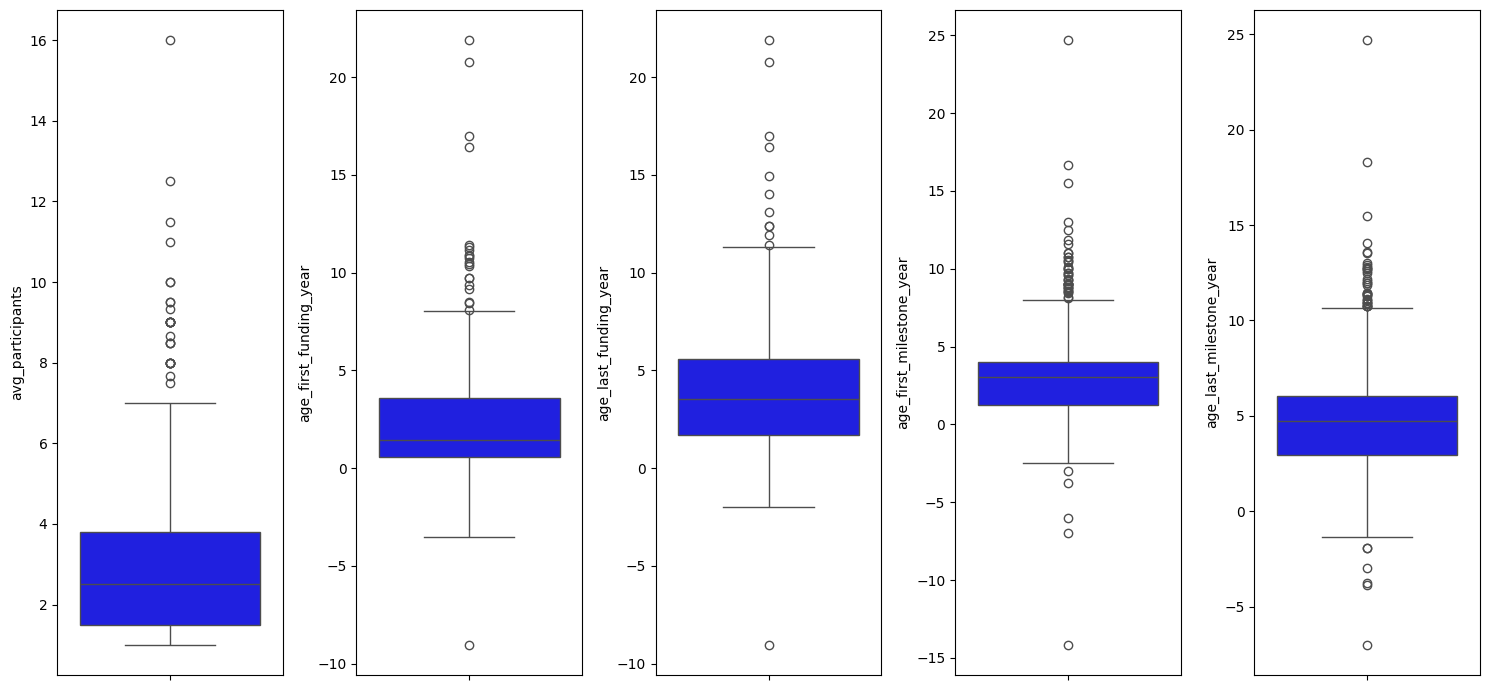

In [161]:
continuous_variables = [
    'avg_participants',
    'age_first_funding_year',
    'age_last_funding_year',
    'age_first_milestone_year',
    'age_last_milestone_year'
]
plt.figure(figsize=(15, 7))
for i in range(0, len(continuous_variables)):
    plt.subplot(1, len(continuous_variables), i+1)
    sns.boxplot(y=dataframe[continuous_variables[i]], color='blue', orient='v')
    plt.tight_layout()

The main observations are:
- In box plots 2, 3, 4, and 5, we observe the presence of negative values extending below the zero line on the y-axis.
  
- The points lying above the upper whisker represent the positive outliers. We will address these in a later stage of our analysis.

Let's see how two variables are connected and find negative values with the following methode.

**Scatter plots** help us see the connection between two variables, making it easier to find unusual points or negative values.

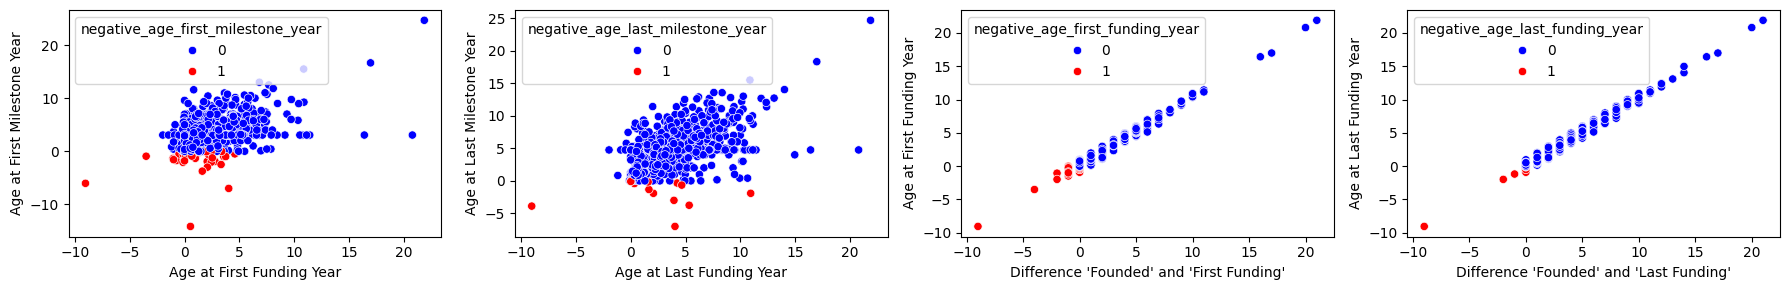

In [162]:
def negative_values_detection(dataframe):
    def convert_to_datetime(dataframe, columns):
        for col in columns:
            dataframe[col] = pd.to_datetime(dataframe[col])

        dataframe["diff_founded_first_funding"] = (
            dataframe["first_funding_at"].dt.year - dataframe["founded_at"].dt.year
        )
        dataframe["diff_founded_last_funding"] = (
            dataframe["last_funding_at"].dt.year - dataframe["founded_at"].dt.year
        )

    def add_negative_value_columns(dataframe, columns):
        for col in columns:
            dataframe[f'negative_{col}'] = (dataframe[col] < 0).astype(int)

    custom_palette = {0: "blue", 1: "red"}

    def create_scatter_plots(dataframe, plots_config, figsize=(18, 3), dpi=100, custom_palette={0: "blue", 1: "red"}):
        plt.figure(figsize=figsize, dpi=dpi)

        for i, (x, y, hue, xlabel, ylabel) in enumerate(plots_config, start=1):
            plt.subplot(1, len(plots_config), i)
            sns.scatterplot(x=x, y=y, hue=hue, palette=custom_palette, data=dataframe)
            plt.xlabel(xlabel)
            plt.ylabel(ylabel)

        plt.tight_layout()
        plt.show()

    plots_config = [
        ("age_first_funding_year", "age_first_milestone_year", "negative_age_first_milestone_year", "Age at First Funding Year", "Age at First Milestone Year"),
        ("age_last_funding_year", "age_last_milestone_year", "negative_age_last_milestone_year", "Age at Last Funding Year", "Age at Last Milestone Year"),
        ("diff_founded_first_funding", "age_first_funding_year", "negative_age_first_funding_year", "Difference 'Founded' and 'First Funding'", "Age at First Funding Year"),
        ("diff_founded_last_funding", "age_last_funding_year", "negative_age_last_funding_year", "Difference 'Founded' and 'Last Funding'", "Age at Last Funding Year"),
    ]

    convert_to_datetime(dataframe, ['founded_at', 'first_funding_at', 'last_funding_at'])
    add_negative_value_columns(dataframe, ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year'])
    create_scatter_plots(dataframe, plots_config)

# Call the function
negative_values_detection(dataframe)


From the scatterplot we identified the following: 

- Negative values are highlighted in red, while positive values are indicated in blue.
- The occurrence of negative values could be attributed to several reasons, such a data entry errors, or a relative timing. However, without definitive context, we cannot be certain of the exact cause.

Before starting our analysis, we'll focus on how to handle these negative values. By doing so, we can maintain the integrity of our analysis and ensure that our insights are based on accurate and representative data.

#### Handle Negative Values

Using the absolute value is a method for effectively handling negative values. We can achieve this with the `np.abs` function. Let's observe how the plot changed after removing negative values.

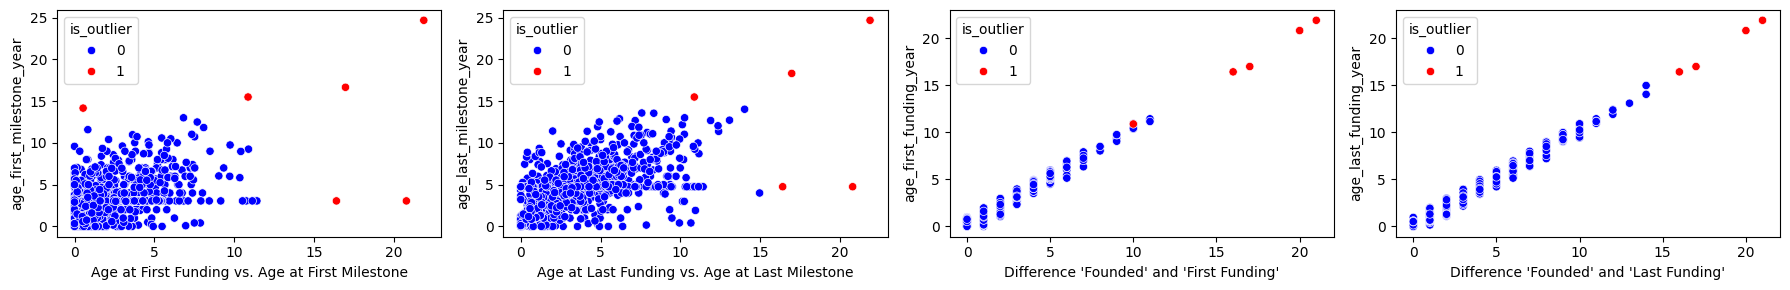

In [163]:
def apply_absolute_values(dataframe, columns):
    for col in columns:
        if col in dataframe.columns:  
            dataframe[col] = np.abs(dataframe[col])

columns_to_abs = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]
apply_absolute_values(dataframe, columns_to_abs)

def identify_outliers(dataframe, columns, threshold=4):
    dataframe['is_outlier'] = 0  # Initialize the is_outlier column
    
    for column_name in columns:
        if column_name in dataframe:
            column = dataframe[column_name]
            mean = column.mean()
            std = column.std()
            is_outlier = (np.abs(column - mean) > threshold * std)  # Calculate outliers based on the threshold
            dataframe['is_outlier'] |= is_outlier.astype(int)  # Update is_outlier column accordingly
    
    return dataframe

def prepare_plot_data(data_df):
    """
    Prepares the data by calculating necessary columns for plotting.
    """
    # Calculate the absolute differences and add them as new columns to the DataFrame
    data_df["abs_diff_founded_first_funding"] = np.abs(data_df["first_funding_at"].dt.year - data_df["founded_at"].dt.year)
    data_df["abs_diff_founded_last_funding"] = np.abs(data_df["last_funding_at"].dt.year - data_df["founded_at"].dt.year)

plot_configs = [
    ("age_first_funding_year", "age_first_milestone_year", "Age at First Funding vs. Age at First Milestone"),
    ("age_last_funding_year", "age_last_milestone_year", "Age at Last Funding vs. Age at Last Milestone"),
    ("abs_diff_founded_first_funding", "age_first_funding_year", "Difference 'Founded' and 'First Funding'"),
    ("abs_diff_founded_last_funding", "age_last_funding_year", "Difference 'Founded' and 'Last Funding'"),
]

def plot_scatter_plots(data_df, plot_configs, custom_palette={0: "blue", 1: "red"}):
    """
    Generates scatter plots based on the provided configuration.
    """
    plt.figure(figsize=(18, 3), dpi=100)

    for x, y, label in plot_configs:
        # Determine the index for subplotting dynamically
        index = plot_configs.index((x, y, label)) + 1
        plt.subplot(1, len(plot_configs), index)
        sns.scatterplot(x=x, y=y, hue="is_outlier", palette=custom_palette, data=data_df)
        plt.xlabel(label)
        plt.ylabel(y)

    plt.tight_layout()
    plt.show()

# Call prepare_plot_data to prepare necessary data for plotting
prepare_plot_data(dataframe)

# Call identify_outliers to identify outliers
identify_outliers(dataframe, ['age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year'])

# Call plot_scatter_plots to generate scatter plots
plot_scatter_plots(dataframe, plot_configs)

 The second set of scatter plots shows the following:

- After applying the absolute value transformation, all the negative values have been converted to their positive counterparts. The absolute value effectively corrects any anomalies that resulted in negative ages or time spans, allowing for a more accurate representation of the time intervals between events.

This time, we focus on the positive outliers (the red points). These points will be analyzed using histograms to better understand their distribution and frequency.

 ### Outliers

Outliers are data points that stand out from the rest of the data because they are much higher or lower than most of the other values in the dataset. To detect these outliers, we'll use **histograms**. These are visual representations that help us understand the distribution of our data. By plotting the frequency of data points, histograms make it easier to spot any values that fall far outside the typical range.

Let's determine which variables have the highest number of outliers.

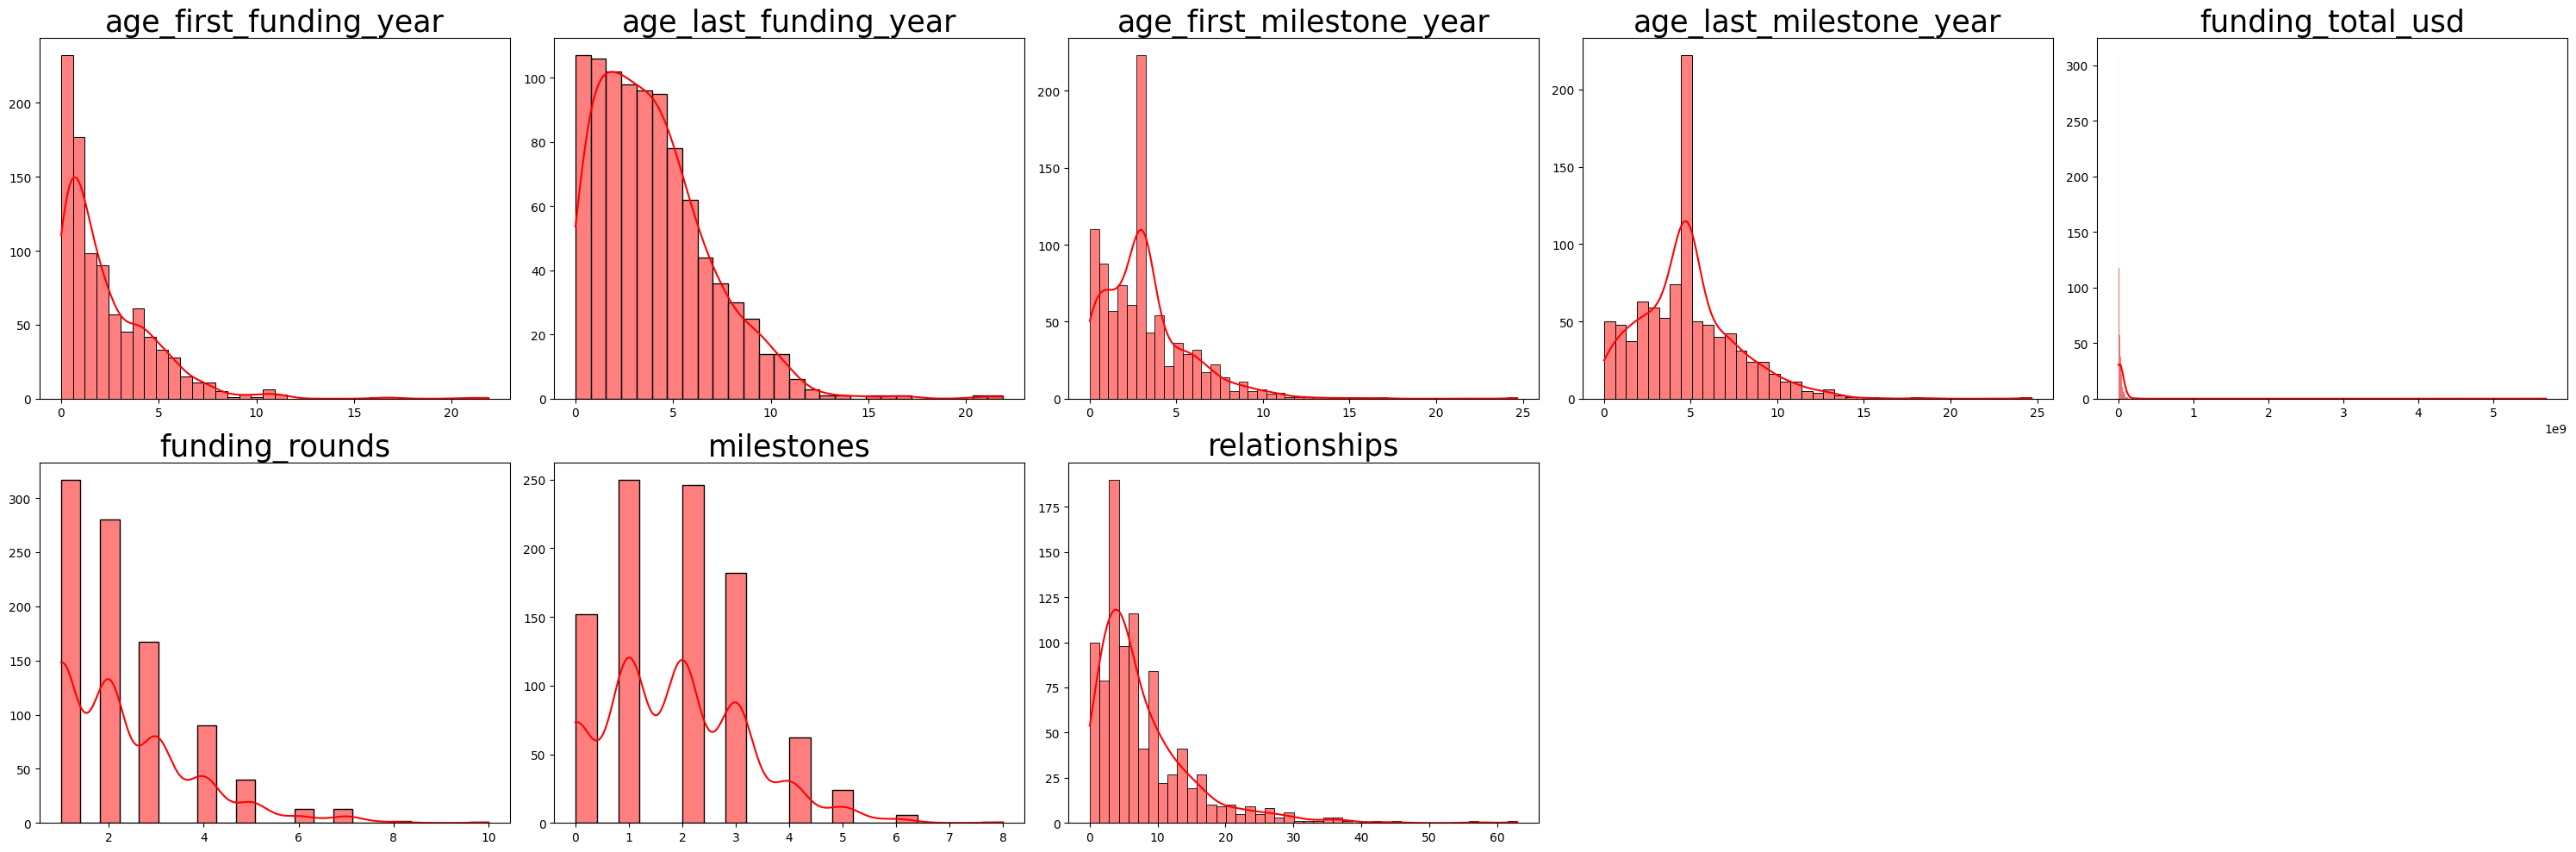

In [164]:
# Select only numeric columns for histogram plots
specific_variables = [
    "age_first_funding_year", "age_last_funding_year",
    "age_first_milestone_year", "age_last_milestone_year", 
    "funding_total_usd", "funding_rounds", 
    "milestones", "relationships"
]
# Determine the number of rows and columns for the subplots
num_variables = len(specific_variables)
num_columns = 5  
num_rows = int(np.ceil(num_variables / num_columns))

# Set the overall figure size 
fig_width = num_columns * 6  
fig_height = num_rows * 5    

plt.figure(figsize=(fig_width, fig_height))

for i, column in enumerate(specific_variables):
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(column, fontsize=25)
    sns.histplot(dataframe[column], color="red", kde=True)  # Adding KDE for smooth distribution curve.
    plt.xlabel('')  
    plt.ylabel('') 

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

As observed in the histogram, noticeable spikes are apparent in the data. Excluding binary variables, the variables with the most prominent spikes are:

- `age_first_funding_year` 
- `age_first_milestone_year`
- `age_last_milestone_year`
- `funding_total_usd`
- `relationships`

#### Handle Outliers

To handle these outliers we will use the **log-transformed method** that involves taking the logarithm of each data point. Can be useful when data has a wide range of values, helping to balance the data.

The following set of graphs illustrates the dataset before and after applying log transformation.

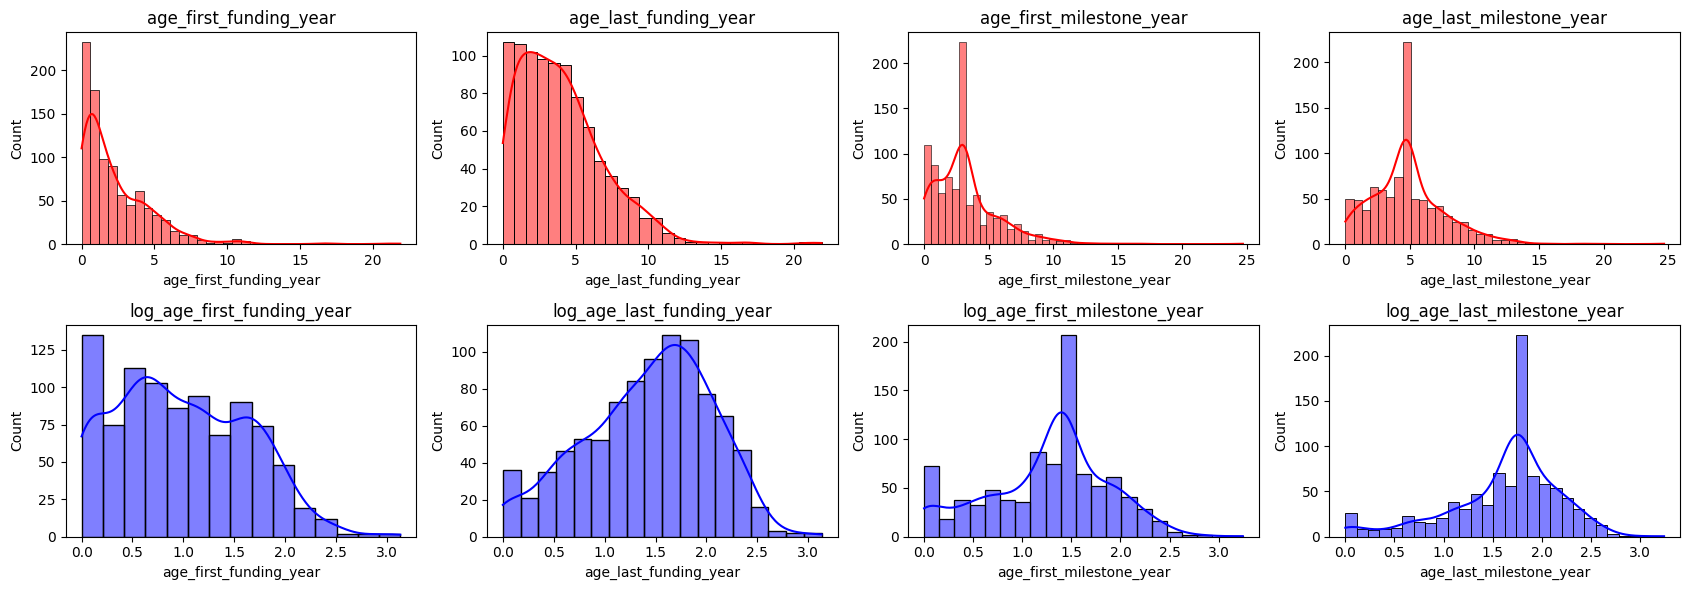

In [165]:
variables = ["age_first_funding_year", "age_last_funding_year", "age_first_milestone_year", "age_last_milestone_year"]

# Create a figure with a specific size
plt.figure(figsize=(17, 6), dpi=100)

# Loop through the list of variables
for i, variable in enumerate(variables):
    # Regular histogram
    plt.subplot(2, 4, i + 1)
    sns.histplot(dataframe[variable], color="red", kde=True)
    plt.title(variable)

    # Log-transformed histogram
    plt.subplot(2, 4, i + 5)
    log_variable = np.log(dataframe[variable] + 1)  # Adding 1 to avoid log(0)
    sns.histplot(log_variable, color="blue", kde=True)
    plt.title(f"log_{variable}")

plt.tight_layout()
plt.show()

The distinction is evident; in the blue histogram, the peak is noticeably lower than in the red histogram.

When you use the logarithm on data, **compresses** the outliers closer to the rest of the values. This makes the distribution of the data look more like a balanced and symmetrical shape, similar to a bell curve. 

It's important to note that log transformation doesn't remove outliers, it reduces their impact.
  
Now that we've addressed negative values and outliers, lets quickly inspect the first row of your DataFrame after sorting by index.

In [166]:
dataframe.sort_index().head(2)

,state_code,city,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,...,status,diff_founded_first_funding,diff_founded_last_funding,negative_age_first_funding_year,negative_age_last_funding_year,negative_age_first_milestone_year,negative_age_last_milestone_year,abs_diff_founded_first_funding,abs_diff_founded_last_funding,is_outlier
0,CA,San Diego,2007-01-01,NaN,2009-04-01,2010-01-01,2.2493,3.0027,4.6685,6.7041,...,acquired,2,3,0,0,0,0,2,3,0
1,CA,Los Gatos,2000-01-01,NaN,2005-02-14,2009-12-28,5.1260,9.9973,7.0055,7.0055,...,acquired,5,9,0,0,0,0,5,9,0


#### Creating Variables

Another way to make the data more suitable for analysis is to create new variables (features) from existing ones and potentially transform or modify the data. 

We want to create a visualization of the **Number of Startups created Over the Years**. To achieve this, we will generate `founded_year` and `proportions` variables.

In [167]:
#We have excluded the closed_at feature from our data analysis to avoid skewing results with closures. 
#Our focus is on identifying factors that predict a startup's potential for acquisition.
dataframe = dataframe.sort_values(by='closed_at', ascending=False )
dataframe = dataframe.drop(['closed_at'], axis=1).copy()

# Extract and format the year from 'founded_at' as 'founded_year'
dataframe['founded_year'] = dataframe['founded_at'].dt.strftime('%Y')

# Group the DataFrame by 'founded_year' and count occurrences
prop_df = dataframe.groupby('founded_year').size().reset_index(name = 'counts')

# Calculate the proportions of startups founded each year
prop_df['proportions'] = prop_df['counts']/prop_df['counts'].sum()

### Transforming Non-numeric Data into Numeric Values

Just like we did with our target variables previously, let's apply the **mapping** technique again to convert the remaining categorical features into numerical ones. 


In [168]:
#Selecting key categorical columns for focused analysis or preprocessing allowing for 
#safe experimentation and manipulation.
columns_to_copy = ["status", "state_code", "category_code"]
categorical_data = dataframe[columns_to_copy].copy()

#Mapping categorical columns
categorical_columns = ['state_code', 'city', 'category_code','founded_year','status']
#Dictionary to store mappings
column_mappings = {}

# Create a function to generate mappings
def create_mapping(column):
    unique_values = dataframe[column].unique()
    mapping = {value: i for i, value in enumerate(unique_values)}
    return mapping

# Apply mapping for each categorical column
for column in categorical_columns:
    mapping = create_mapping(column)
    dataframe[column] = dataframe[column].map(mapping)
    # Save mapping in the dictionary
    column_mappings[column] = mapping

# Now, column_mappings contains the desired dictionary structure
print(column_mappings)

{'state_code': {'NY': 0, 'CA': 1, 'PA': 2, 'FL': 3, 'WA': 4, 'GA': 5, 'CT': 6, 'MA': 7, 'NJ': 8, 'IL': 9, 'MI': 10, 'VA': 11, 'AZ': 12, 'OH': 13, 'UT': 14, 'TX': 15, 'DC': 16, 'ME': 17, 'TN': 18, 'ID': 19, 'NC': 20, 'WV': 21, 'MN': 22, 'KY': 23, 'MO': 24, 'CO': 25, 'NM': 26, 'NH': 27, 'NV': 28, 'MD': 29, 'WI': 30, 'OR': 31, 'AR': 32, 'IN': 33, 'RI': 34}, 'city': {'New York': 0, 'San Francisco': 1, 'Allentown': 2, 'Tampa': 3, 'Seattle': 4, 'Los Altos': 5, 'Atlanta': 6, 'Santa Clara': 7, 'Farmington': 8, 'Palo Alto': 9, 'San Jose': 10, 'Menlo Park': 11, 'San Diego': 12, 'Bedford': 13, 'Mountain View': 14, 'Burlingame': 15, 'Princeton': 16, 'Sunnyvale': 17, 'Chicago': 18, 'Hillsborough': 19, 'Bingham Farms': 20, 'Los Angeles': 21, 'Waltham': 22, 'Campbell': 23, 'Charlottesville': 24, 'Warrenville': 25, 'Redwood City': 26, 'Milpitas': 27, 'Tempe': 28, 'New York City': 29, 'Cincinnati': 30, 'Salt Lake City': 31, 'Redmond': 32, 'Yorba Linda': 33, 'Bellevue': 34, 'Pasadena': 35, 'Dallas': 36,

We proceed with converting the **datetime features** to numerical values by transforming each specified column into days.

In [169]:
# Set a reference date. You could choose the earliest date in your dataset or a specific date.
reference_date = dataframe[['founded_at', 'first_funding_at', 'last_funding_at']].min().min()

# List of columns to convert
columns_to_convert = ['founded_at', 'first_funding_at', 'last_funding_at']

# Convert each specified column into days since the reference date
for column in columns_to_convert:
    dataframe[f'{column}_days'] = (dataframe[column] - reference_date).dt.days

# Optionally, you might drop the original datetime columns if they're not needed anymore.
dataframe.drop(['founded_at', 'first_funding_at', 'last_funding_at'], axis=1, inplace=True)

## Recap of Data Preprocessing ####

After a comprehensive preprocessing transformation, we will outline the steps we have taken with our data to improve its quality and gain more accurate insights.

- Filtering Irrelevant Values: We simplified the dataframe by reducing the number of variables from 50 to 24, removing unnecessary ones.

- Handling Missing Values: Identified and managed missing values through imputation techniques.

- Addressing Negative Values: Utilized Box Plot and Scatter Plot methods to detect negative values, then handled them with the np.abs() function.

- Managing Outliers: Employed Histograms for outlier detection and addressed them using a log-transformed technique.

- Creation Variables : From existing ones, we generate and transform variables.

- Conversion of Non-numeric Data:  Changed text data to numbers to better analyze.

After finishing all the preprocessing steps, let's take a final quick look at the types of features in the dataset and their respective counts. Now that all features have been converted to numerical format, they're ready for data analysis.

In [170]:
numerical_features = dataframe.select_dtypes(include=['number']).columns.tolist()
categorical_features = dataframe.select_dtypes(include=['object']).columns.tolist()
datetime_features = dataframe.select_dtypes(include=['datetime']).columns.tolist()

# Assuming the target variable is 'status'
target_variable = ['status']

# Print the lists along with the number of features
print("Numerical Features ({0}):".format(len(numerical_features)))
print(numerical_features)

print("\nCategorical Features ({0}):".format(len(categorical_features)))
print(categorical_features)

print("\nDatetime Features ({0}):".format(len(datetime_features)))
print(datetime_features)

print("\nTarget Variable ({0}):".format(len(target_variable)))
print(target_variable)

Numerical Features (33):
['state_code', 'city', 'age_first_funding_year', 'age_last_funding_year', 'age_first_milestone_year', 'age_last_milestone_year', 'relationships', 'funding_rounds', 'funding_total_usd', 'milestones', 'category_code', 'has_VC', 'has_angel', 'has_roundA', 'has_roundB', 'has_roundC', 'has_roundD', 'avg_participants', 'is_top500', 'status', 'diff_founded_first_funding', 'diff_founded_last_funding', 'negative_age_first_funding_year', 'negative_age_last_funding_year', 'negative_age_first_milestone_year', 'negative_age_last_milestone_year', 'abs_diff_founded_first_funding', 'abs_diff_founded_last_funding', 'is_outlier', 'founded_year', 'founded_at_days', 'first_funding_at_days', 'last_funding_at_days']

Categorical Features (0):
[]

Datetime Features (0):
[]

Target Variable (1):
['status']


We export the cleaned DataFrame to a CSV file for further use or sharing. 

In [171]:
dataframe.to_csv('cleaned_data.csv', index=False) 

After finally improving the quality of the data, we can now proceed to the most exciting part: getting some insights.

##  Data Analysis

### Top 10 Sectors with High Startup Acquisition Rates

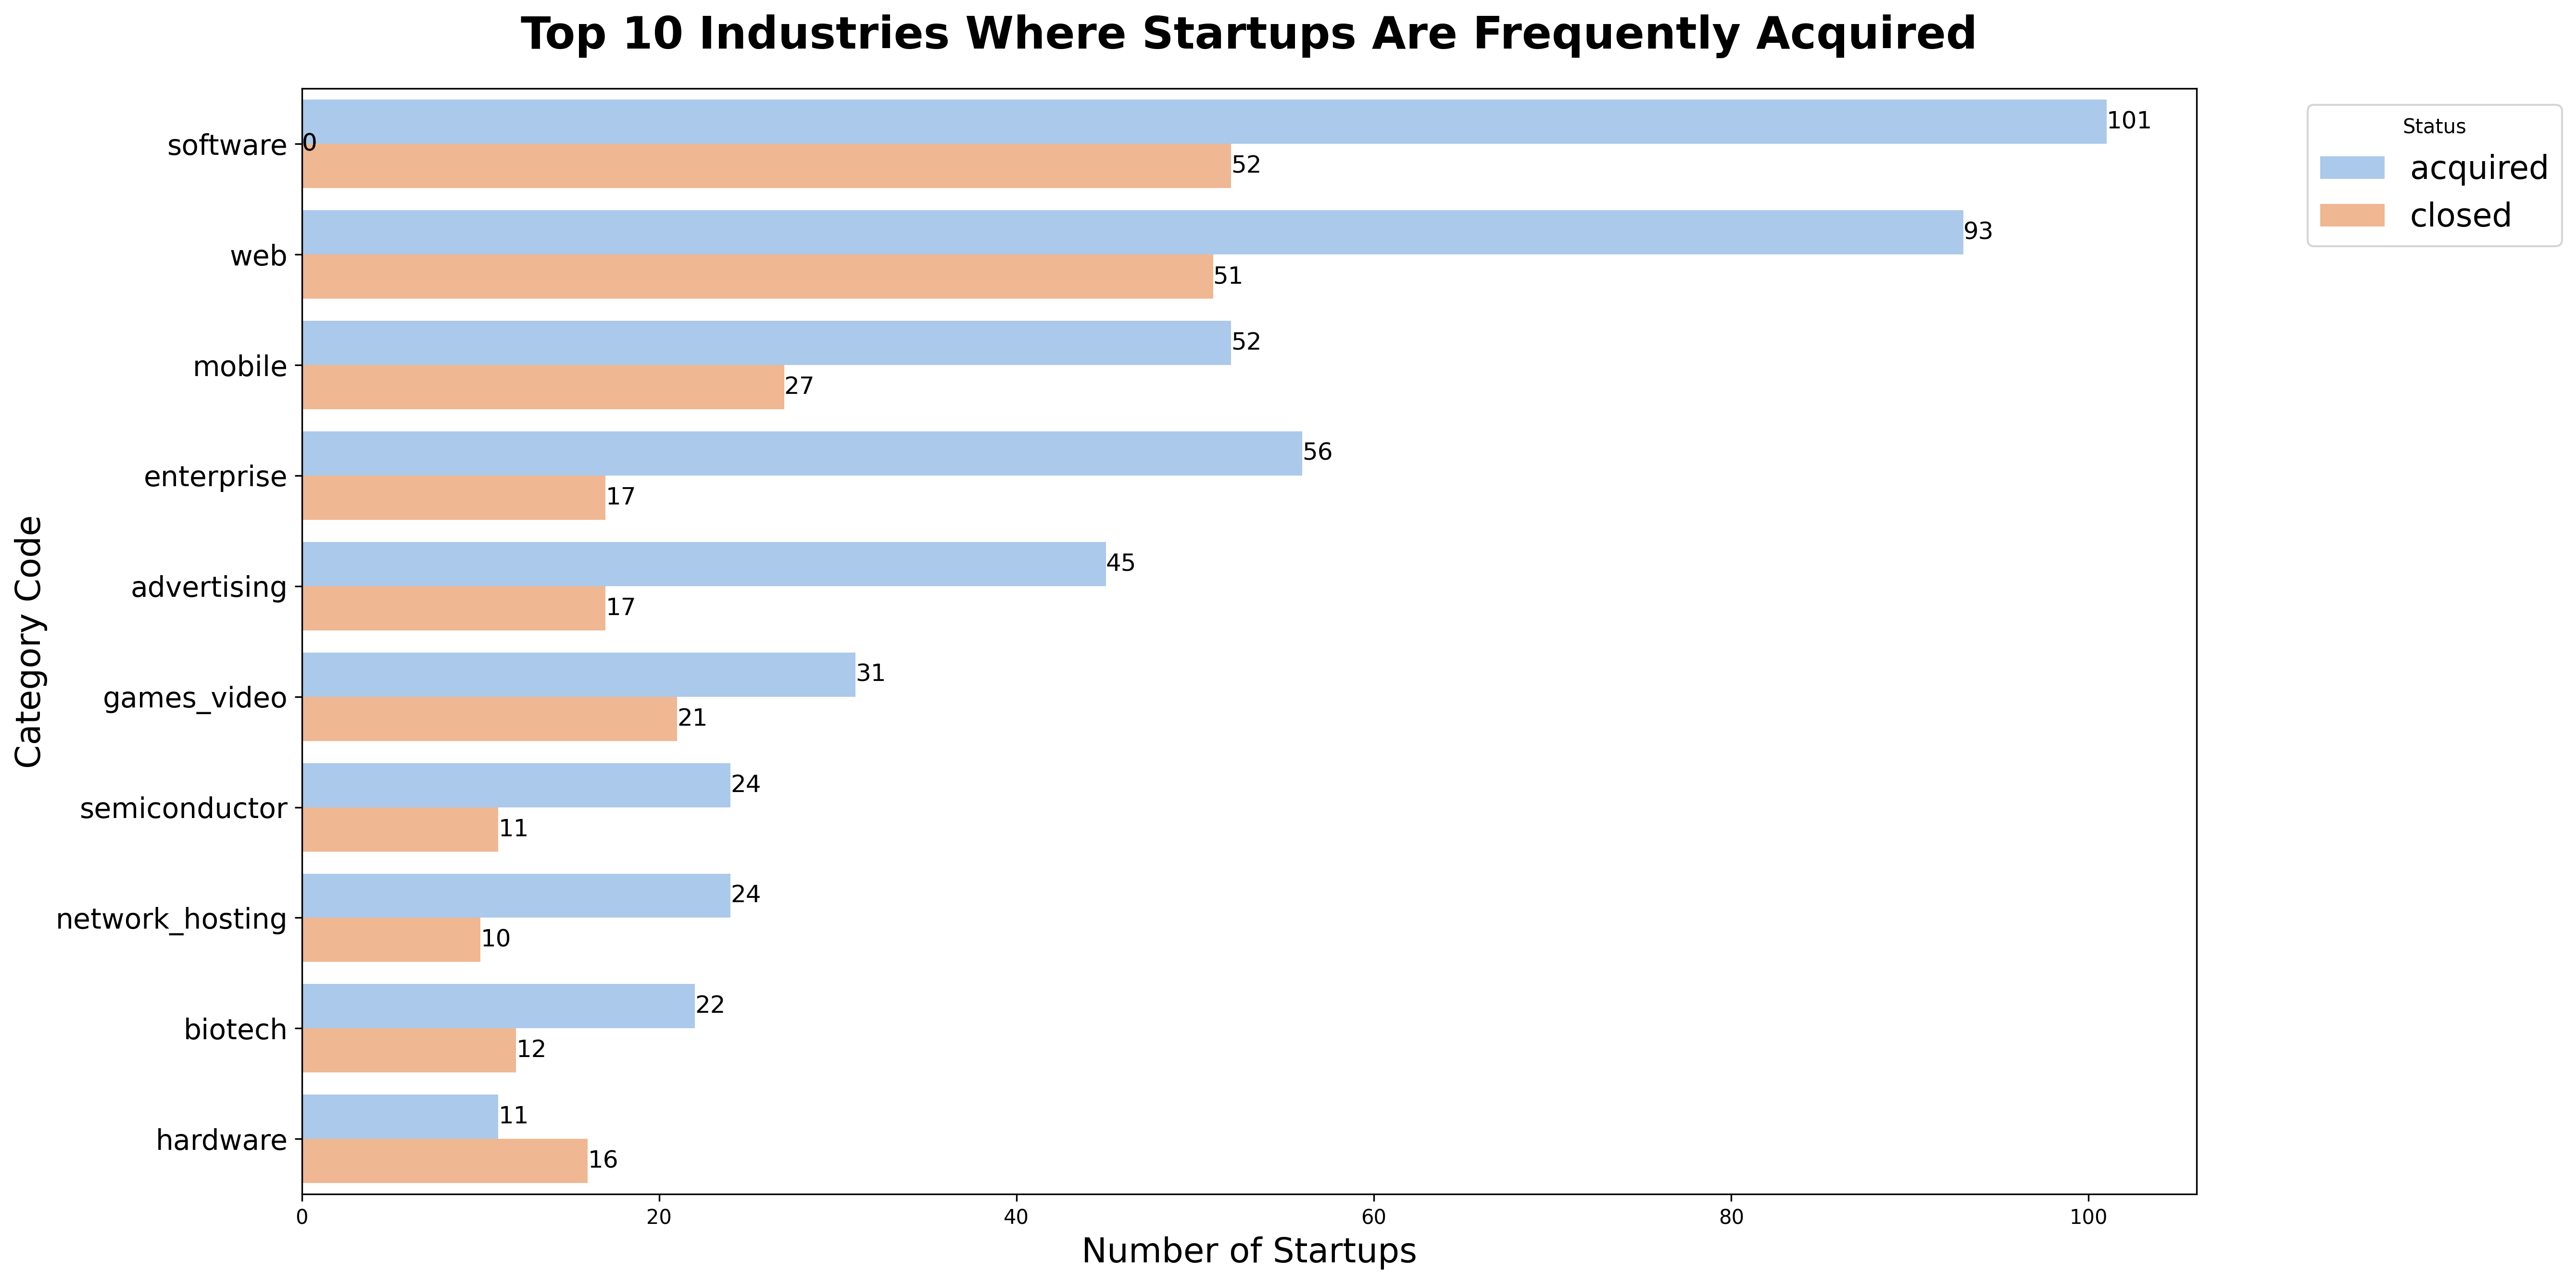

In [171]:
%matplotlib inline

# Getting the order of categories based on their frequency
# (now for y-axis since we are doing a horizontal bar plot)
order = categorical_data["category_code"].value_counts().index[:10]

# Create the countplot with horizontal bars
plt.figure(figsize=(18, 9), dpi=300)

# Specify the hue order explicitly
ax = sns.countplot(
    y="category_code", data=categorical_data, order=order, palette="pastel",
    hue='status', hue_order=['acquired', 'closed']
)

plt.title("Top 10 Industries Where Startups Are Frequently Acquired", fontsize=22, pad=20, fontweight='bold')
plt.xlabel("Number of Startups",fontsize=17)
plt.ylabel("Category Code", fontsize=17)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=16)

# Set the font size of the category labels using tick_params
ax.tick_params(axis='y', labelsize=14) 

# Iterate through the patches (bars) and add text
for bar in ax.patches:
    # Get the position and width of the bar
    bar_y = bar.get_y() + bar.get_height() / 2  # Y-coordinate of the center of the bar
    bar_width = bar.get_width()  # Width of the bar (count value)

    # Add text to the right end of the bar
    ax.text(bar_width, bar_y, f'{int(bar_width)}', 
            fontsize=12, color='black', ha='left', va='center')

plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()

As observed in the bar chart, we identify the following:

- The software industry has the highest number of startups and sees a significant portion of these ventures being acquired by larger entities. 

- This trend highlights how the software industry's constant innovation and growth attract big companies interested in new technologies or looking to grow their tech capabilities.

- Similarly, the web, mobile, and enterprise sectors emerge as vibrant ecosystems, containing many startups.

Our next step is to examine time's influence on startup acquisition patterns in the industries.

### Year of the highest number of startups founded

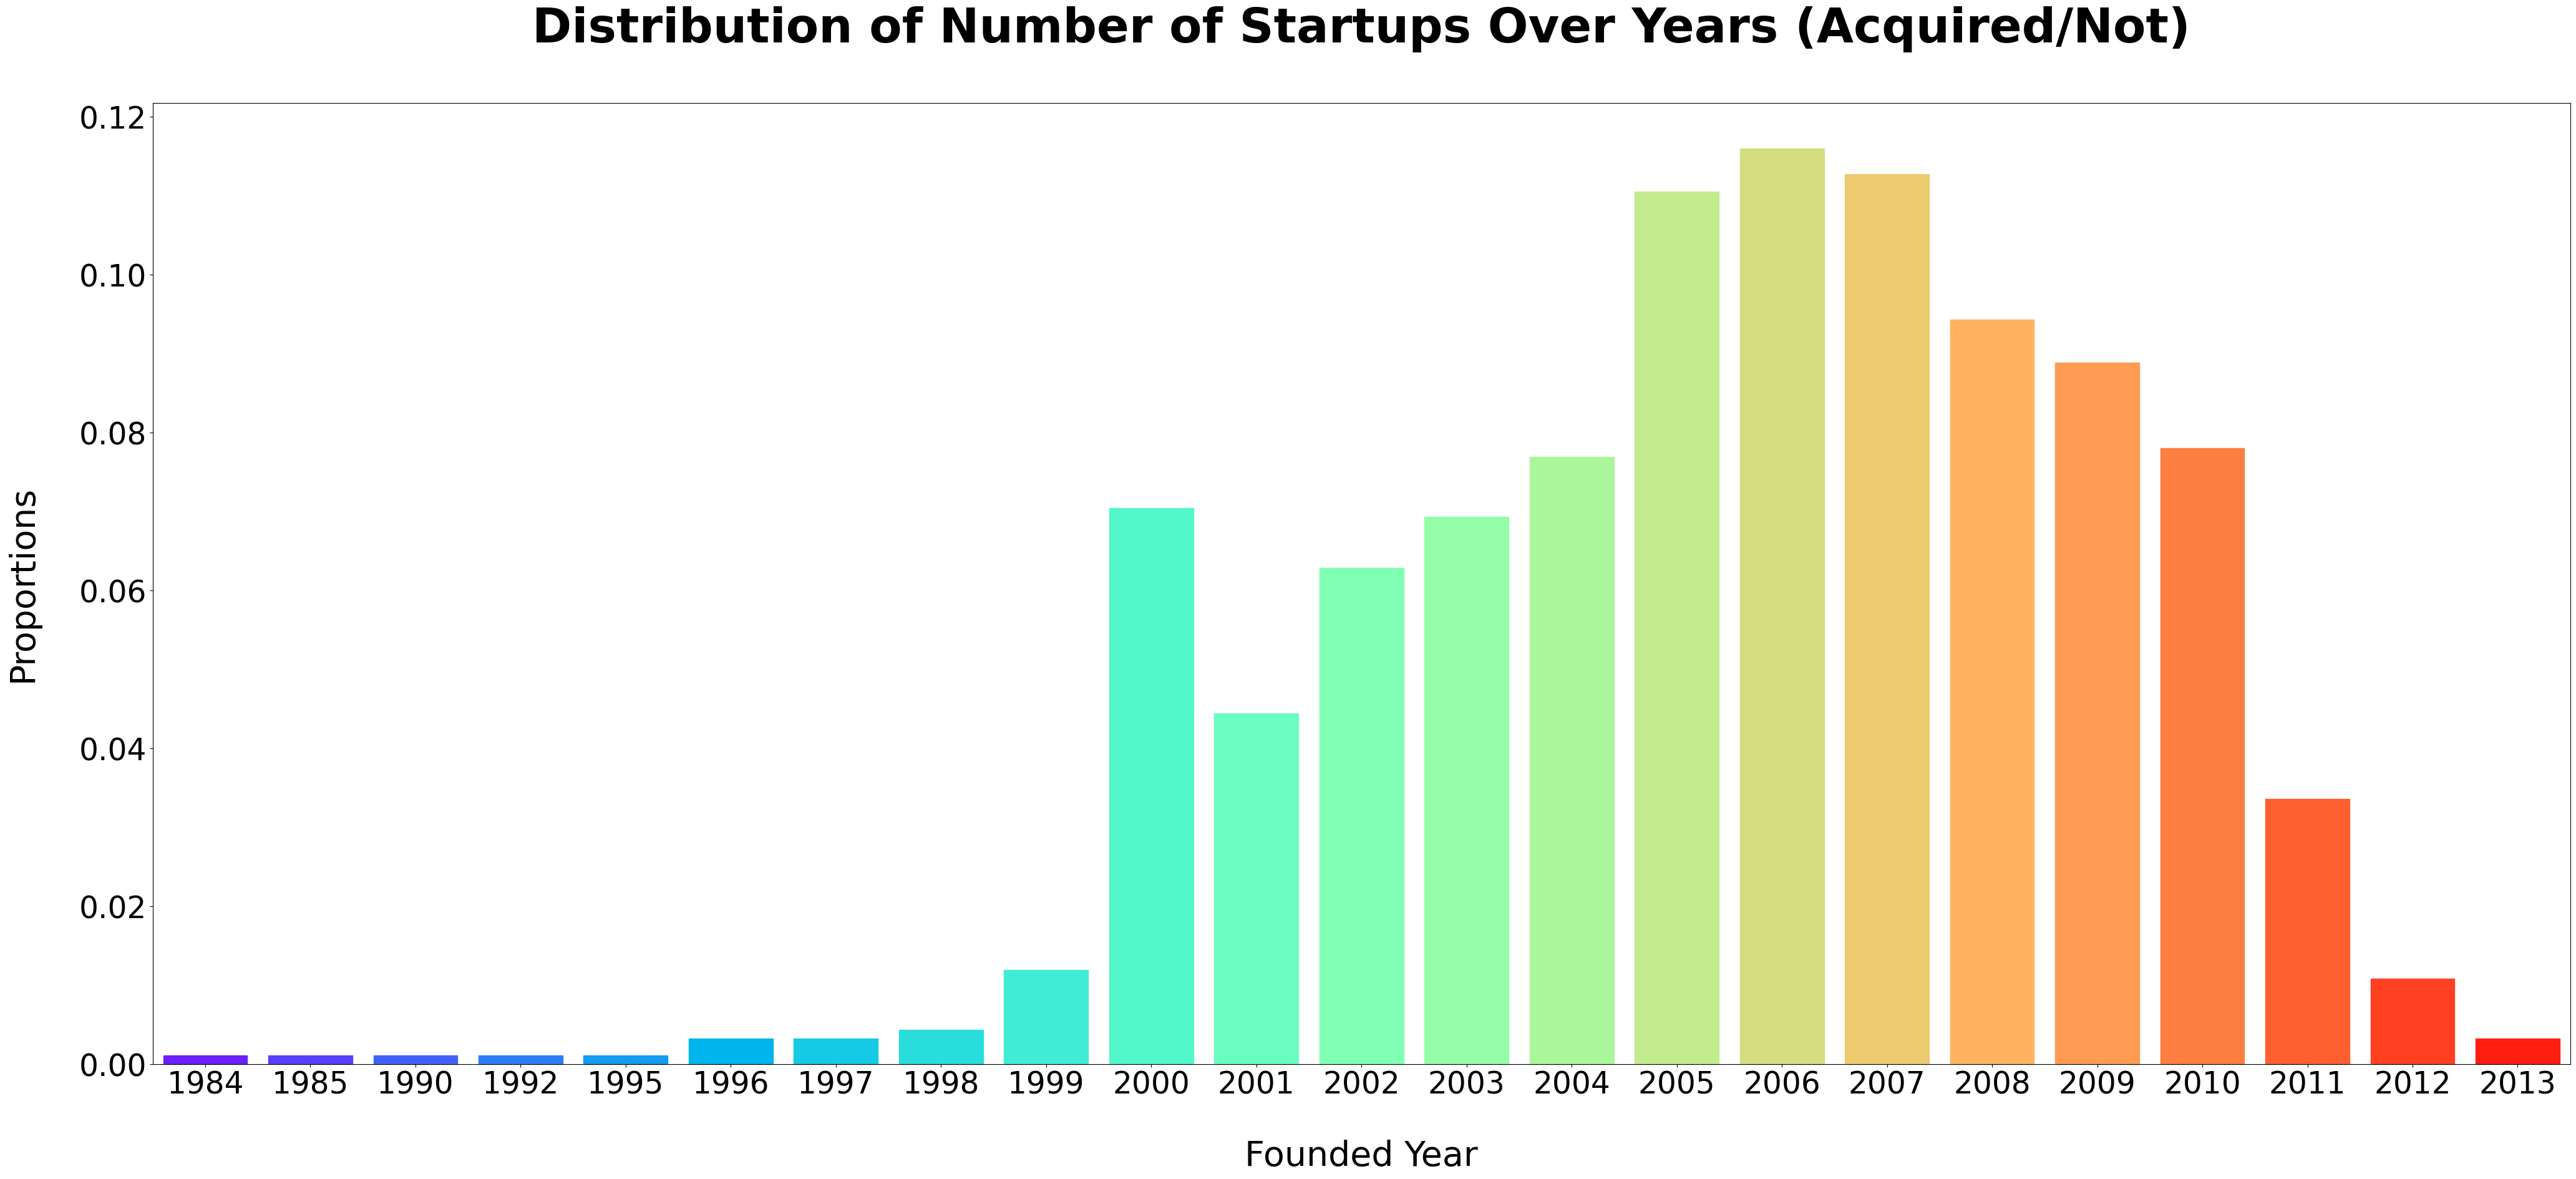

In [172]:
fig, ax = plt.subplots(figsize=(50, 20))
# Adjust the font size as needed
ax.tick_params(axis='x', labelsize=35)  

# Optionally, change the font size of the tick labels on the y-axis as well
ax.tick_params(axis='y', labelsize=35) 

ax.set_xlabel('Founded Year', fontsize=40,labelpad=45) 
ax.set_ylabel('Proportions', fontsize=40, labelpad=45)  
# Create a barplot without a hue parameter
barplot = sns.barplot(data=prop_df, x='founded_year', y='proportions')

# Manually set colors for each bar if you want them to be different
colors = sns.color_palette("rainbow", n_colors=len(prop_df['founded_year']))
for i, bar in enumerate(barplot.patches):
    bar.set_color(colors[i % len(colors)])

plt.title('Distribution of Number of Startups Over Years (Acquired/Not)',fontsize=55, pad=70, fontweight='bold')
plt.show()

Based on the visualization, we identify the following:

- Looking at the history of startups, we see a significant increase in activity until 2007, indicating an era of rapid growth. The rise in startup activity during this era is probably connected to the rise of the internet and digital technologies.

- Following the year 2007, the market experienced a significant decline. Several factors could have brought about this decline. One of the possible reasons could have been the worldwide financial crisis that occurred around that time., market saturation, or changes in how investors act.

Let's go ahead to explore how location influences startup success.

### Startup Acquisitions Across U.S. States

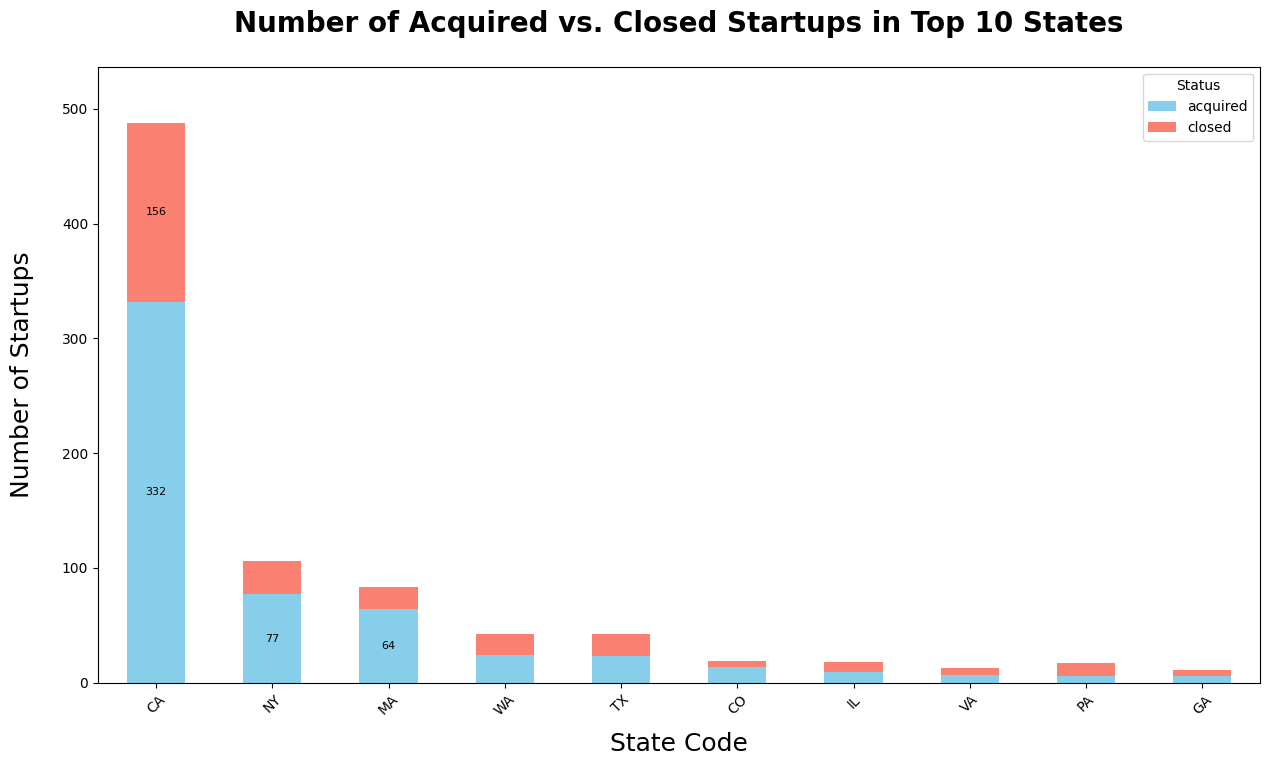

In [173]:
# Create the stacked bar chart
import matplotlib.pyplot as plt

grouped_data = categorical_data.groupby(['state_code', 'status']).size().unstack().fillna(0)

# Sort the DataFrame by the sum of 'acquired' and 'closed' for each state and take the first 10
grouped_data = grouped_data.sort_values(by=['acquired', 'closed'], ascending=False).head(10)

# Convert the index to string to ensure proper handling as categorical data
grouped_data.index = grouped_data.index.astype(str)

ax = grouped_data.plot(kind='bar', stacked=True, figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Number of Acquired vs. Closed Startups in Top 10 States',fontsize=20, pad=25, fontweight='bold')
plt.xlabel('State Code', fontsize=18,labelpad=10)
plt.ylabel('Number of Startups', fontsize=18,labelpad=20)
plt.xticks(rotation=45)  # Rotates the state labels for better readability
plt.legend(title='Status')

threshold = 50 

# Add text annotations
for i, (state_code, row) in enumerate(grouped_data.iterrows()):
    cumulative_height = 0
    for status in ['acquired', 'closed']:  # Iterate in a specific order
        count = row[status]
        # Display annotation only if count is above the threshold
        if count > threshold:
            # Position text at the center of each segment
            ax.text(i, cumulative_height + count / 2, f'{int(count):,}', 
                    fontsize=8, color='black', ha='center', va='center')
        cumulative_height += count

# Slightly adjust the ylim to make room for text annotations
ax.set_ylim(0, grouped_data.max().sum() * 1.1)  
plt.show()

The bar chart shows the following location trends:

- California (CA) stands out with the highest number of startups, where the number of acquired startups is more than double the number closed.

- New York (NY) and Massachusetts (MA) also exhibit a pattern where more startups are being acquired than closed, suggesting a favorable startup environment in these states.
  
- In other states such as Washington (WA), Texas (TX), and Colorado (CO), the number of acquisitions and closures are closer, pointing to a more challenging environment.

### Factors correlated with startup acquisitions

We can use a correlation heatmap to easily identify the variables that are strongly correlated with the target variable `status`. 

We will compare two correlation methods - Pearson's and Spearman's - to analyze the features with absolute correlation values.

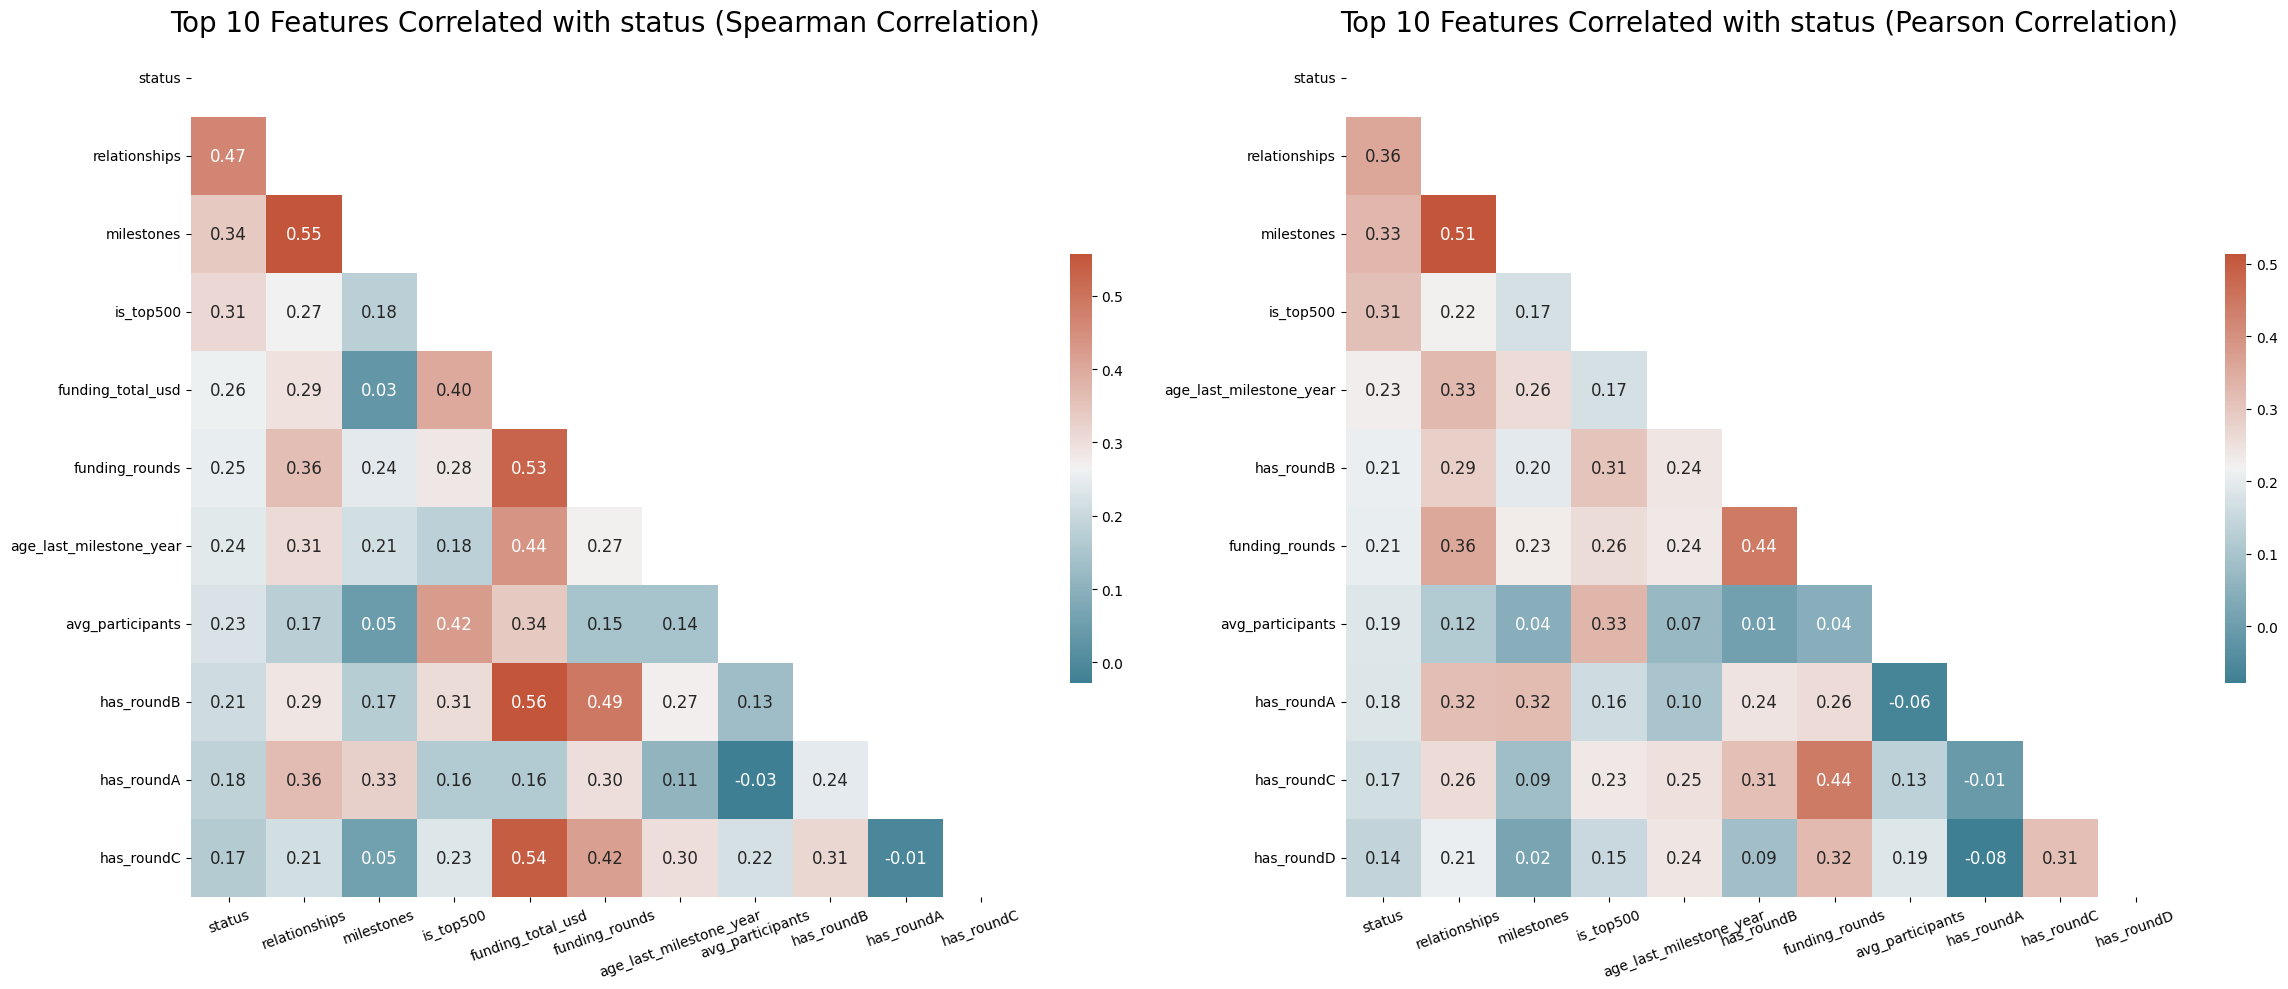

In [174]:
def draw_heatmaps_side_by_side(data_df, target='status'):
    """
    """
    # Ensure target is in DataFra
    if target not in data_df.columns:
        raise ValueError(f"Target '{target}' not found in DataFrame columns.")
    
    # Function to calculate and return top correlated features' correlation matrix
    def get_top_correlations(data_df, method):
        corr = data_df.corr(method=method)
        top_features = corr[target].abs().sort_values(ascending=False).head(11).index
        return corr.loc[top_features, top_features]
    
    # Calculate correlation matrices
    top_spearman_corr = get_top_correlations(data_df, 'spearman')
    top_pearson_corr = get_top_correlations(data_df, 'pearson')
    
    # Setup for dual heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(24, 10))  
    cmap = sns.diverging_palette(220, 20, as_cmap=True)  # Diverging color map
    
    # Draw heatmaps
    for ax, corr, title in zip(axes, [top_spearman_corr, top_pearson_corr], 
                               ['Spearman Correlation', 'Pearson Correlation']):
        sns.heatmap(corr, ax=ax, cmap=cmap, annot=True, fmt=".2f", annot_kws={"size": 12},
                    cbar_kws={"shrink": .5}, mask=np.triu(np.ones_like(corr, dtype=bool)))
        ax.set_title(f'Top 10 Features Correlated with {target} ({title})', fontsize=20)
        ax.tick_params(axis='y', rotation=0)
        ax.tick_params(axis='x', rotation=20)
    
    plt.tight_layout()
    plt.show()

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','datetime64']
numerical_df_1 = dataframe.select_dtypes(include=numerics)

draw_heatmaps_side_by_side(numerical_df_1)


Based on the heatmaps comparing Spearman and Pearson correlation coefficients for top features correlated with startup 'status,'we can conclude.

- `relationships` The number of partnerships a startup forms has a notable correlation with its outcomes, with Spearman at 0.47 and Pearson at 0.36. Strong business relationships can be an important factor in the growth and success of a startup.
  
- `milestones` When a startup achieves significant objectives, it tends to have a more favorable outcome. The numbers show a strong correlation: 0.34 in Spearman's and 0.33 in Pearson's analysis, indicating that reaching milestones is a common characteristic of startups with positive results.
  
- `funding_rounds`The total amount of funding a startup receives is also connected to its outcomes. The data shows a Spearman correlation of 0.25 and a Pearson correlation of 0.21. This suggests that the more funding a startup has, the more likely it is to have a successful path.


Now that we have established their relationship, let's address each variable individually and proceed to explore the following key questions:

 ### Does the number of milestones achieved impact a startup's chance of getting acquired?

In [175]:
# Group your data by milestones and status and count the occurrences
grouped = dataframe.groupby(["milestones", "status"]).size().reset_index(name="count")
grouped.columns = ["source", "target", "value"]
grouped['target'] = grouped['target'].map({0: 'closed', 1: 'acquired'})
grouped['source'] = grouped.source.map({0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 8: '8'})
links = pd.concat([grouped], axis=0)
unique_source_target = list(pd.unique(links[['source', 'target']].values.ravel('K')))
mapping_dict = {k: v for v, k in enumerate(unique_source_target)}
links['source'] = links['source'].map(mapping_dict)
links['target'] = links['target'].map(mapping_dict)

# Convert links DataFrame to dictionary
links_dict = links.to_dict(orient='list')

# Apply the color map to the links
# Directly use the 'acquired' and 'closed' labels to determine the color
link_colors = ['rgba(144, 238, 144, 0.5)' if target == 'acquired' else 'rgba(255, 0, 0, 0.5)' for target in grouped['target']]


fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=unique_source_target,
        color="white"
    ),
    link=dict(
        source=links_dict["source"],
        target=links_dict["target"],
        value=links_dict["value"],
        color=link_colors  # Apply the colors to the links
    )
)])

fig.update_layout(
    annotations=[
        dict(
            x=0.5,  # Set x to 0.5 for centering horizontally
            y=1.20,  # Adjust y as needed 
            text="Analyzing the Correlation: Milestones Achievement vs Startup Status",
            showarrow=False,
            font=dict(
                size=18,
                family="Arial, sans-serif"  
            ),
            textangle=0,  
            xref="paper",
            yref="paper"
        ),
        # Add a comma here after the closing brace of the first dictionary
        dict(
            x=-0.10,  # Position to the left of the diagram
            y=0.5,    # Vertically centered
            text="Milestones Achievement",  # Text for the left side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  
            xref="paper",
            yref="paper"
        ),
        dict(
            x=1.05,  # Position to the right of the diagram
            y=0.5,   
            text="Startup Status",  # Text for the right side
            showarrow=False,
            font=dict(size=15),
            textangle=-90,  
            xref="paper",
            yref="paper"
        )
    ]
)

fig.show()

The Sankey diagram indicates that Startups reaching 1-4 milestones have a higher chance of being acquired.

This highlights the importance of validating a startup's business model and execution capabilities in the early stages. Startups can minimize the risk of closure by setting and achieving initial milestones, which can serve as a roadmap for new startups.

Let's now turn our attention to the types of investment.

### Do startups funded in rounds have a better chance of being acquired?

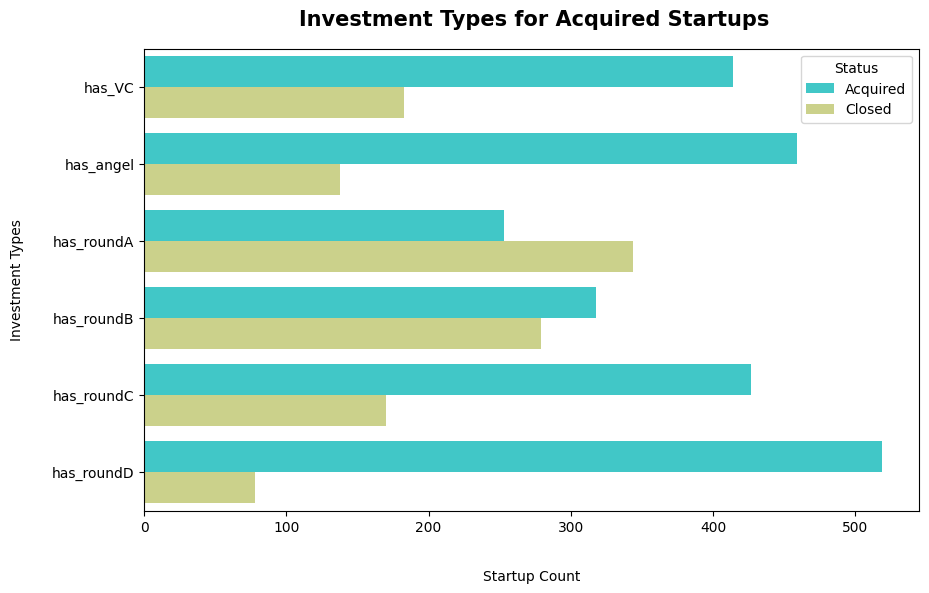

In [176]:
# Filter the DataFrame for entries with a status of 1
d = dataframe.loc[dataframe['status'] == 1]

# Select only the relevant binary columns
f = d[["has_VC", "has_angel", "has_roundA", "has_roundB", "has_roundC", "has_roundD"]]

# Melt the DataFrame to long format for use with countplot
melted_f = pd.melt(f)

# Map the binary values to strings
melted_f['value'] = melted_f['value'].map({1: 'acquired', 0: 'closed'})

# Create the countplot with horizontal bars
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=melted_f, y='variable', hue='value', orient='h', palette="rainbow")

# Update the y-axis label with adjusted position
ax.set_ylabel("Investment Types", labelpad=20)  # Adjust labelpad for position
ax.set_xlabel("Startup Count", fontsize=10, labelpad=25)

# Create the title manually and adjust its position
ax.text(0.2, 1.05, "Investment Types for Acquired Startups", fontsize=15, transform=ax.transAxes, fontweight='bold')  # Adjust the x and y values

# Update the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Acquired','Closed'], title='Status')

plt.show()

Based on the data provided, startups that have gone through multiple rounds of funding (from angel investments to rounds A, B, C, and D) do show a higher likelihood of being acquired. 

Startups that go through more rounds of funding, especially those that secure venture capital or angel investment, are more likely to be acquired than to close down. This could mean that the more confidence investors have in a startup (as shown by continued funding), the greater the startup's chances of success, in this case being defined as an acquisition.

Each successful funding round may indicate that the startup is meeting milestones and scaling effectively, which can make it a more attractive target for acquisition. However, it's important to recognize that while the correlation exists, it does not guarantee an acquisition.


 #### Average funding for acquired vs. closed startups

In [177]:
colors = ['#1f77b4', '#d62728']

# Filter out extreme outliers from the data
max_value = dataframe['funding_total_usd'].quantile(0.99) 
filtered_data = dataframe[dataframe['funding_total_usd'] < max_value]

status_mapping = {1: 'Acquired', 0: 'Closed'}
filtered_data['status'] = filtered_data['status'].map(status_mapping)

# Create a histogram with the filtered data
fig = px.histogram(data_frame=filtered_data, x='funding_total_usd', color='status',
                   labels={'funding_total_usd': 'Total Funding (USD in Millions)'},
                   color_discrete_sequence=colors)  
                   
# Update layout for better visualization
fig.update_layout(
    title={
        'text': 'Distribution of Total Funding : Acquired vs Closed Startups',
        'y': 0.95,  # You can adjust this for vertical position
        'x': 0.5,  # You can adjust this for horizontal position
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {
            'size': 17,
            'color': 'black',  # You can change the color if you want
            'family': 'Arial, sans-serif', # You can change the font family if you want
        },
    },
    xaxis_title='Total Funding (USD in Millions)',
    yaxis_title='Frequency',
)
# Format the x-axis tick labels to display values in millions
fig.update_xaxes(tickformat=".2s", exponentformat="none")

# Show the figure
fig.show()

/var/folders/v9/155gqsr9413657wtlxqls3680000gn/T/ipykernel_16911/697612596.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/gabrielaarzate/.virtualenvs/startup/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



The funding is shown in U.S. dollars, ranging from 0 to over 120 million

- A large majority of both acquired and closed startups have received funding of 20 million U.S. dollars or less.
- Startups that closed tend to have a higher frequency in the lower funding brackets (below 20 million USD) compared to those acquired.
- As the amount of funding increases, the number of closed startups decreases more rapidly than that of acquired startups.
Very few startups, whether acquired or closed, have funding above 60 million USD.

Data suggests that having less funding is more common among startups that eventually close. Meanwhile, those that get acquired show a wider range of funding, including higher amounts. 

##  Data-driven conclusions

After a depth analysis of the variables,  it's apparent that certain factors strongly influence the likelihood of startups being acquired. These include number of business relationships, number and timing of milestones reached, types of investment, alongside the historical record of fundings are significant factors to consider.

Data preprocessing played a key role in turning raw information into practical insights. Critical steps as imputation techniques, identifying negative and missing values and carefully addressing outliers provided meaningful and accurate information about the underlying patterns. 

Keeping in mind that every technique will be used differently depending on the nature of the data. 

Visual representations enable us to decode intricate relationships, recognize trends, and making it more accessible and intuitive for interpretation.

By following this workflow, a data analysis project becomes more manageable, efficient, and produces reliable results that can inform critical decisions in various domains, including startup success prediction.